In [1]:
from ConvergenceAnalysis import *


In [2]:
fd_data

,Molecule,FD
0,He,1.322234
1,Be,45.616381
2,Ne,2.376747
3,Mg,81.593730
4,Ar,10.758002
5,N2,15.030438
6,F2,14.642223
7,NaCl,28.700184
8,LiCl,24.532474
9,CO,14.466840


In [3]:
def process_data(base_path):
    base_high = base_path.joinpath('high-high')
    base_low = base_path.joinpath('low-low')

    mols = fd_data['Molecule'].to_list()
    low_data = get_database_residuals_z(mols, base_low)
    high_data = get_database_residuals_z(mols, base_high)
    # add column to low_data and high_data indicating low or high called ground state
    low_data['Ground Protocol'] = 'Medium'
    high_data['Ground Protocol'] = 'High'
    # combine dataframe
    data = pd.concat([low_data, high_data])

    # concatenate the protocol and ground state columns to make a new column
    data['Response Protocol'] = data['Protocol'].astype(str)
    # if protocol is 'High' or 'Low' then set it to 'H' or 'L' 
    data.loc[data['Response Protocol'] == 'High', 'Protocol'] = 'High'
    data.loc[data['Response Protocol'] == 'Medium', 'Protocol'] = 'Medium'
    data.loc[data['Response Protocol'] == 'Low', 'Protocol'] = 'Low'
    return data



In [4]:

october_absolute_path = Path('/mnt/data/madness_data/october_absolute/')
october_absolute_kain_path = Path('/mnt/data/madness_data/october_absolute_kain/')
fd_compare2 = Path('/mnt/data/madness_data/fd_compare2/')
fd_compare_data = process_data(fd_compare2)
absolute_kain_data = process_data(october_absolute_kain_path)
absolute_data = process_data(october_absolute_path)

paper_path = Path('/home/adrianhurtado/projects/writing/mra-tdhf-polarizability/Figures_v2')



He
He /mnt/data/madness_data/fd_compare2/low-low/hf/He/dipole_hf_0-000000/response_base.json
He /mnt/data/madness_data/fd_compare2/low-low/hf/He/dipole_hf_0-395340/response_base.json
/mnt/data/madness_data/fd_compare2/low-low/hf/He/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/fd_compare2/low-low/hf/He/beta.json'
Be
Be /mnt/data/madness_data/fd_compare2/low-low/hf/Be/dipole_hf_0-000000/response_base.json
Be /mnt/data/madness_data/fd_compare2/low-low/hf/Be/dipole_hf_0-088930/response_base.json
/mnt/data/madness_data/fd_compare2/low-low/hf/Be/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/fd_compare2/low-low/hf/Be/beta.json'
Ne
Ne /mnt/data/madness_data/fd_compare2/low-low/hf/Ne/dipole_hf_0-000000/response_base.json
Ne /mnt/data/madness_data/fd_compare2/low-low/hf/Ne/dipole_hf_0-368977/response_base.json
/mnt/data/madness_data/fd_compare2/low-low/hf/Ne/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/fd_compare2/low-l

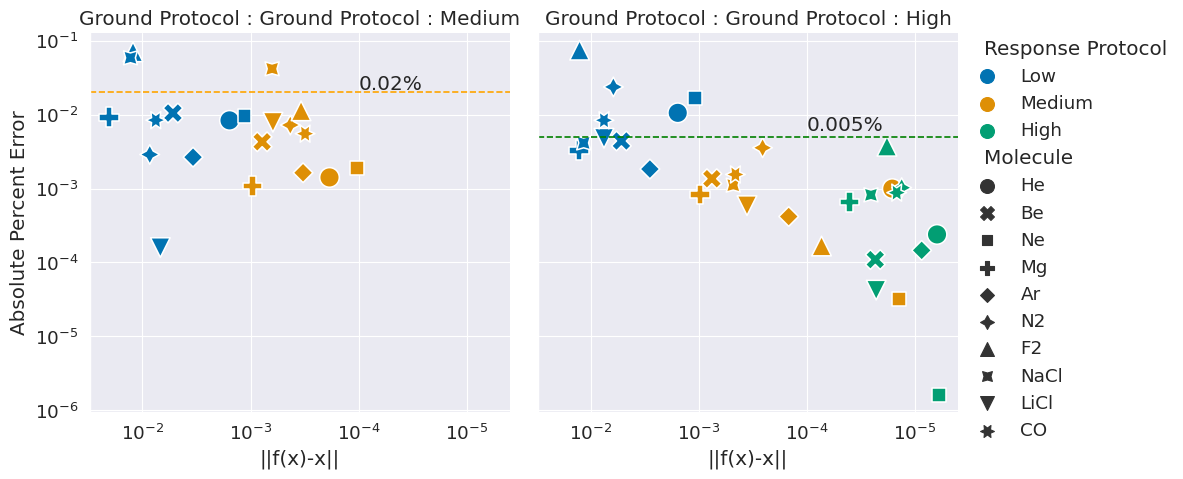

In [5]:
data = fd_compare_data
data = absolute_data
data = absolute_kain_data

sns.set_context("paper", font_scale=1.50)
sns.set_style("darkgrid")
sns.set_palette("colorblind")
style = 'Molecule'
hue = 'Response Protocol'
s = 200
x = 'Absolute Residual Z'
g = sns.relplot(x=x, y='Absolute Percent Error', data=data, style=style, hue=hue, s=s,
                col='Ground Protocol')
# set the subplot titles to Ground Protocol = H or M
g.set_titles(col_template="Ground Protocol : {col_name}")
# increase the font of the legend

for ax in g.axes.flat:
    ax.set_xscale('log')
    ax.set_yscale('log')
    # write an annotation indicating the green line is .005
    # only on first left plot
    if ax == g.axes.flat[0]:
        ax.axhline(.02, ls='--', color='orange')
        ax.annotate('0.02%', xy=(1e-4, .02), xytext=(1e-4, .022))
    else:
        ax.axhline(.005, ls='--', color='green')
        ax.annotate('0.005%', xy=(1e-4, .005), xytext=(1e-4, .006))
        
# Draw a y=x line on each plot
for ax in g.axes.flat:
    ax.set_xlabel('||f(x)-x||')
    # y label is percent error of static polarizability
    ax.set_title('Ground Protocol : {}'.format(ax.get_title()))

g.fig.gca().invert_xaxis()
# Change the marker size in the legend to be larger and more legible
for lh in g.legend.legend_handles: 
    lh._sizes = [100]
# save a high res version
#g.savefig(paper_path.joinpath('mra_convergence.png'),dpi=600)


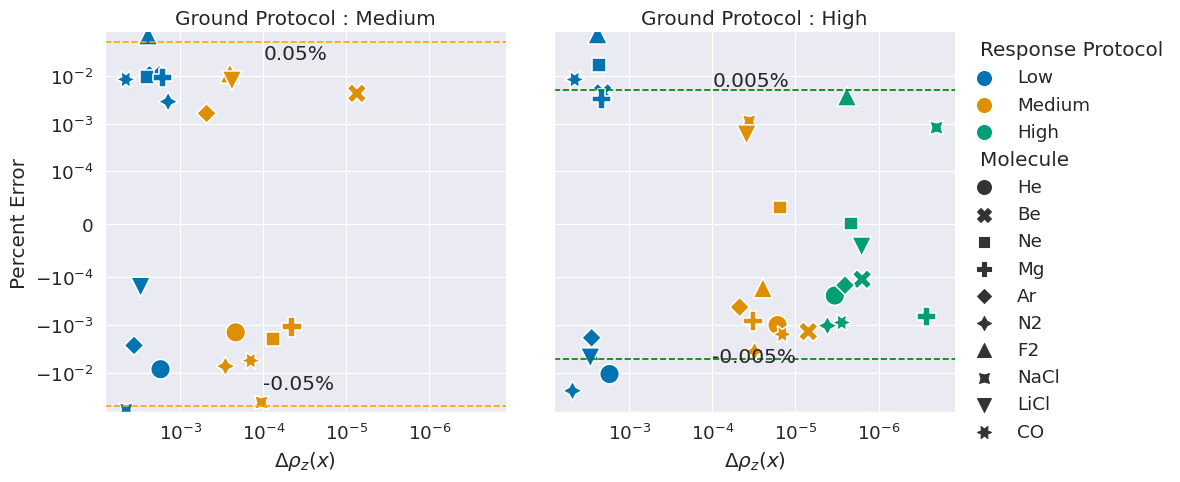

In [6]:
data = fd_compare_data
data = absolute_data
data = absolute_kain_data

sns.set_context("paper", font_scale=1.50)
sns.set_style("darkgrid")
sns.set_palette("colorblind")
style = 'Molecule'
hue = 'Response Protocol'
s = 200
x = 'dz'
g = sns.relplot(x=x, y='Percent Error', data=data, style=style, hue=hue, s=s,
                col='Ground Protocol')
# set the subplot titles to Ground Protocol = H or M
g.set_titles(col_template="Ground Protocol : {col_name}")
# increase the font of the legend

for ax in g.axes.flat:
    ax.set_xscale('log')
    ax.set_yscale('symlog', linthresh=1e-4)
    # write an annotation indicating the green line is .005
    # only on first left plot
    if ax == g.axes.flat[0]:
        ax.axhline(.05, ls='--', color='orange')
        ax.axhline(-.05, ls='--', color='orange')
        ax.annotate('0.05%', xy=(1e-4, .02), xytext=(1e-4, .022))
        ax.annotate('-0.05%', xy=(1e-4, -.02), xytext=(1e-4, -.022))
    else:
        ax.axhline(.005, ls='--', color='green')
        ax.axhline(-.005, ls='--', color='green')
        ax.annotate('0.005%', xy=(1e-4, .005), xytext=(1e-4, .006))
        ax.annotate('-0.005%', xy=(1e-4, -.005), xytext=(1e-4, -.006))

# Draw a y=x line on each plot
for ax in g.axes.flat:
    ax.set_xlabel(r'$\Delta \rho_{z}(x)$')
    # y label is percent error of static polarizability

g.fig.gca().invert_xaxis()
# Change the marker size in the legend to be larger and more legible
for lh in g.legend.legend_handles:
    lh._sizes = [100]


In [7]:
data.query('Protocol=="Medium" and Molecule=="NaCl"')
     
 

,Protocol,rz,dz,znorm,MRA,FD,Percent Error,Absolute Percent Error,Absolute Residual Z,Molecule,Ground Protocol,Response Protocol
15,Medium,0.000313,0.000105,2.021725,28.688234,28.700184,-0.041639,0.041639,0.000632,NaCl,Medium,Medium
22,Medium,0.000238,0.000036,2.022146,28.700503,28.700184,0.001110,0.001110,0.000480,NaCl,High,Medium


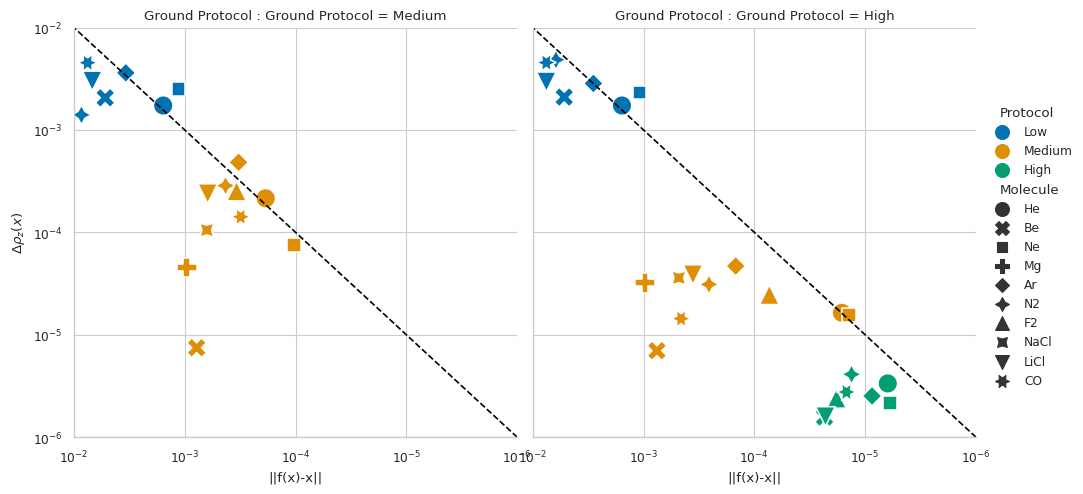

In [8]:


sns.set_context("paper", font_scale=1)
sns.set_style("whitegrid")
sns.set_palette("colorblind")
style = 'Molecule'
hue = 'Protocol'
s = 200
x = 'dz'
y = 'Absolute Residual Z'

g = sns.relplot(x=y, y=x, data=data, hue=hue,style=style, s=s,
                col='Ground Protocol')

for ax in g.axes.flat:
    ax.set_yscale('log')
    ax.set_xscale('log')
# Change the marker size in the legend to be larger and more legible
for lh in g.legend.legend_handles:
    lh._sizes = [100]
    
# draw a y=x line on each plot

for ax in g.axes.flat:
    ax.plot([1e-6,1e-2],[1e-6,1e-2], ls='--', color='black')
    ax.set_xlim(1e-6,1e-2)
    ax.set_ylim(1e-6,1e-2)
    ax.set_xlabel('||f(x)-x||')
    ax.set_ylabel(r'$\Delta \rho_{z}(x)$')
    ax.set_title('Ground Protocol : {}'.format(ax.get_title()))

g.fig.gca().invert_xaxis()



In [9]:

mols=data.Molecule.unique().tolist()


In [10]:
from DataAnalysisClass import *
single = ['aug-cc-pVDZ', 'aug-cc-pVTZ', 'aug-cc-pVQZ', 'aug-cc-pV5Z', 'aug-cc-pV6Z']
single_polarized = ['aug-cc-pCVDZ', 'aug-cc-pCVTZ', 'aug-cc-pCVQZ']
double = ['d-aug-cc-pVDZ', 'd-aug-cc-pVTZ', 'd-aug-cc-pVQZ', 'd-aug-cc-pV5Z', 'd-aug-cc-pV6Z']
double_polarized = ['d-aug-cc-pCVDZ', 'd-aug-cc-pCVTZ', 'd-aug-cc-pCVQZ']
all_basis_sets = single + single_polarized+ double  + double_polarized


In [11]:
low_data=PolarizabilityData(mols,'hf','dipole',all_basis_sets,october_absolute_kain_path.joinpath
('low-low'))
high_data=PolarizabilityData(mols,'hf','dipole',all_basis_sets,october_absolute_kain_path
                                .joinpath
('low-low'))


He /mnt/data/madness_data/october_absolute_kain/low-low/hf/He/dipole_hf_0-000000/response_base.json
He /mnt/data/madness_data/october_absolute_kain/low-low/hf/He/dipole_hf_0-049418/response_base.json
He /mnt/data/madness_data/october_absolute_kain/low-low/hf/He/dipole_hf_0-098835/response_base.json
He /mnt/data/madness_data/october_absolute_kain/low-low/hf/He/dipole_hf_0-148253/response_base.json
He /mnt/data/madness_data/october_absolute_kain/low-low/hf/He/dipole_hf_0-197670/response_base.json
He /mnt/data/madness_data/october_absolute_kain/low-low/hf/He/dipole_hf_0-247088/response_base.json
He /mnt/data/madness_data/october_absolute_kain/low-low/hf/He/dipole_hf_0-296505/response_base.json
He /mnt/data/madness_data/october_absolute_kain/low-low/hf/He/dipole_hf_0-345923/response_base.json
He /mnt/data/madness_data/october_absolute_kain/low-low/hf/He/dipole_hf_0-395340/response_base.json
/mnt/data/madness_data/october_absolute_kain/low-low/hf/He/beta.json
[Errno 2] No such file or direc

In [52]:
def create_z_data(data):
    
    z_data = data.polar_data.query('ij=="zz"').copy()
    z_data['FD'] = z_data.apply(lambda x: fd_data.query('Molecule=="{}"'.format(x.molecule))['FD']
                                .values[0], axis=1)
    # compute the percent error relative to the FD value
    z_data['Percent Error'] = z_data.apply(lambda x: (x['alpha']-x['FD'])/x['FD']*100, axis=1)
    # create a column which includes the MRA Percent error for each molecule
    z_data['MRA Percent Error'] = z_data.apply(lambda x: z_data.query('molecule=="{}"'.format(x.molecule))
    ['Percent Error'].values[0], axis=1)
    z_data['Absolute Percent Error'] = z_data.apply(lambda x: abs(x['Percent Error']), axis=1)
    # make a column to indicate basis is MRA or orther
    z_data['MRA'] = z_data.apply(lambda x: 'Other' if x['basis'] in all_basis_sets else 'MRA', 
                                 axis=1)
    
    z_data=z_data.query('omega==0')
    return z_data



z_data=create_z_data(low_data)
z_data




,molecule,basis,ij,omega,alpha,FD,Percent Error,MRA Percent Error,Absolute Percent Error,MRA
72,He,MRA,zz,0,1.322215,1.322234,-0.001417,-0.001417,0.001417,MRA
89,Be,MRA,zz,0,45.618340,45.616381,0.004295,0.004295,0.004295,MRA
98,Ne,MRA,zz,0,2.376701,2.376747,-0.001921,-0.001921,0.001921,MRA
107,Mg,MRA,zz,0,81.592850,81.593730,-0.001079,-0.001079,0.001079,MRA
116,Ar,MRA,zz,0,10.758180,10.758002,0.001658,0.001658,0.001658,MRA
...,...,...,...,...,...,...,...,...,...,...
10359,CO,d-aug-cc-pVQZ,zz,0,14.469156,14.466840,0.016012,-0.005530,0.016012,Other
10440,CO,d-aug-cc-pV5Z,zz,0,14.466686,14.466840,-0.001065,-0.005530,0.001065,Other
10521,CO,d-aug-cc-pCVDZ,zz,0,14.490765,14.466840,0.165376,-0.005530,0.165376,Other
10602,CO,d-aug-cc-pCVTZ,zz,0,14.487193,14.466840,0.140685,-0.005530,0.140685,Other


['D', 'T', 'Q', '5']


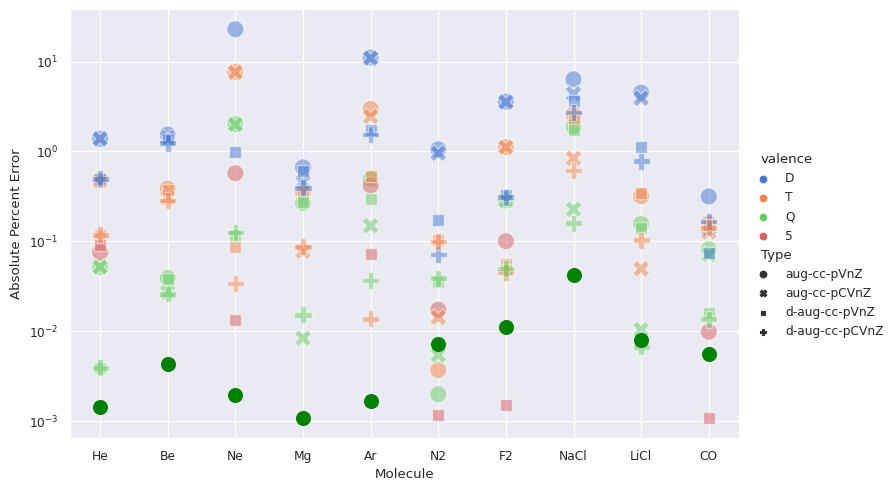

In [53]:

def compare_z_to_basis_set(z_data,y='Percent Error'):

    q_data=z_data.query('basis in @all_basis_sets & omega==0').copy()
    basis_data=make_detailed_df(q_data).query('omega==0').copy()
    # make the color palette go from light red to dark blue and a yellow for the MRA
    colors= sns.color_palette("muted", 4)
    # sns.set(rc={"xtick.bottom": True, "ytick.left": True}, font_scale=1.5)
    pal = sns.color_palette("seismic_r", 4).as_hex()
    p1 = [pal[1], pal[0], pal[2], pal[3]]
    pal = sns.color_palette(p1)
    
    # increase the jitter to make the points more legible
    g=sns.relplot(x='molecule', y=y, data=basis_data.query('omega==0'),
                  style='Type',
                  hue='valence',
                  palette=colors, s=150,
                  height=5,aspect=1.5,alpha=.5)
    
    # set y axis to be log scale
    for ax in g.axes.flat:
        if y=='Percent Error':
            ax.set_yscale('symlog', linthresh=1e-3)
        else:
            ax.set_yscale('log')
        # add the MRA reference line for this data
        # add the mra data to the plot
        ax.scatter(z_data.query('MRA=="MRA"')['molecule'],
                   z_data.query('MRA=="MRA"')[y],
                   color='green', s=100, label='MRA')
        # add a label for the MRA data
    
        ax.set_xlabel('Molecule')
    return g

z_abs_error_plot=compare_z_to_basis_set(z_data,y='Absolute Percent Error')
#z_error_plot=compare_z_to_basis_set(z_data,y='Percent Error')
z_abs_error_plot.fig.savefig(paper_path.joinpath('z_abs_error.png'),dpi=600)


In [45]:
z_data.query('molecule=="N2"')

,molecule,basis,ij,omega,alpha,FD,Percent Error,MRA Percent Error,Absolute Percent Error,MRA
125,N2,MRA,zz,0,15.029350,15.030438,-0.007239,-0.007239,0.007239,MRA
5418,N2,aug-cc-pVDZ,zz,0,14.871613,15.030438,-1.056693,-0.007239,1.056693,Other
5499,N2,aug-cc-pVTZ,zz,0,15.029884,15.030438,-0.003687,-0.007239,0.003687,Other
5580,N2,aug-cc-pVQZ,zz,0,15.030736,15.030438,0.001981,-0.007239,0.001981,Other
5661,N2,aug-cc-pV5Z,zz,0,15.027837,15.030438,-0.017303,-0.007239,0.017303,Other
5742,N2,aug-cc-pCVDZ,zz,0,14.886886,15.030438,-0.955079,-0.007239,0.955079,Other
5823,N2,aug-cc-pCVTZ,zz,0,15.028299,15.030438,-0.014233,-0.007239,0.014233,Other
5904,N2,aug-cc-pCVQZ,zz,0,15.031251,15.030438,0.005406,-0.007239,0.005406,Other
5985,N2,d-aug-cc-pVDZ,zz,0,15.004795,15.030438,-0.170610,-0.007239,0.170610,Other
6066,N2,d-aug-cc-pVTZ,zz,0,15.045909,15.030438,0.102932,-0.007239,0.102932,Other


['D', 'T', 'Q', '5']


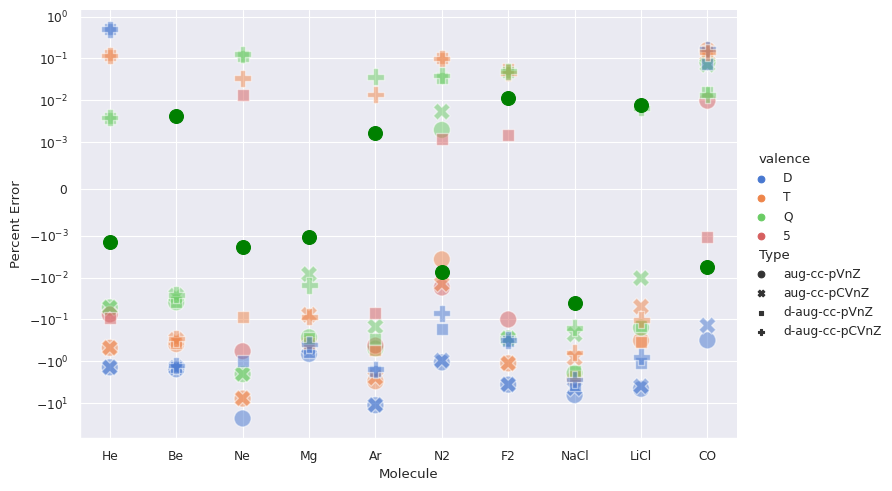